# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("../train_data.csv")
valid_data = pd.read_csv("../valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(229, 2)


,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

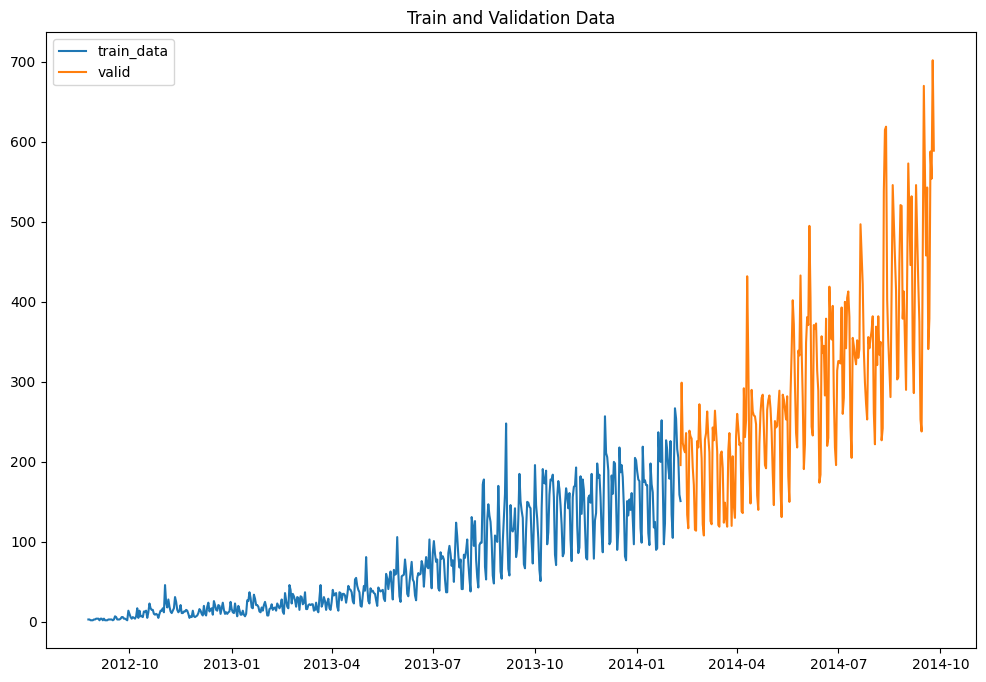

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Stationarity Test

In [8]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [9]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [10]:
adf_test(train_data['count'])

Results of Dickey-Fuller Test:
Test Statistic                   1.182399
p-value                          0.995862
#Lags Used                      19.000000
Number of Observations Used    514.000000
Critical Value (1%)             -3.443136
Critical Value (5%)             -2.867179
Critical Value (10%)            -2.569774
dtype: float64


 If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). **Here test statistic is > than critical. Hence series is not stationary**

In [11]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [12]:
kpss_test(train_data['count'])

Results of KPSS Test:
Test Statistic            3.256383
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Prashant\AppData\Local\Temp\ipykernel_26100\598097767.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).  **Here test statistic is > than critical. Hence series is not stationary**

Alternatively, we can use the p-value to make the inference. If p-value is less than 0.05, we can reject the null hypothesis. And say that the series is not stationary.

# Making Series Stationary

In [13]:
train_data['count_diff'] = train_data['count'] - train_data['count'].shift(1)

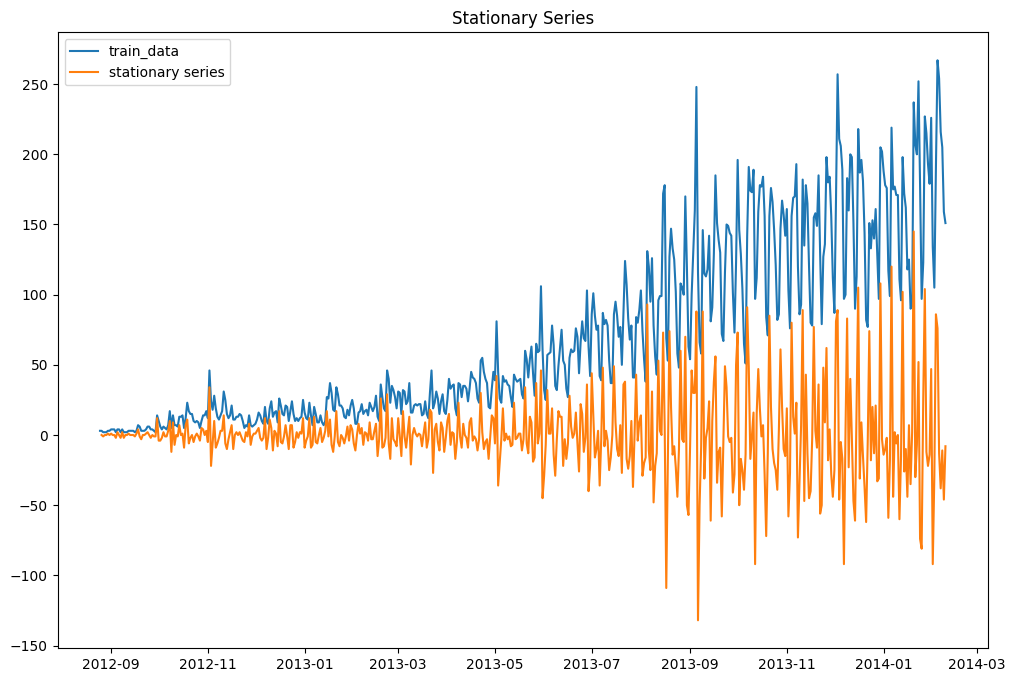

In [14]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(train_data.index,train_data['count_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [153]:
train_data['count_log'] = np.log(train_data['count'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(1)

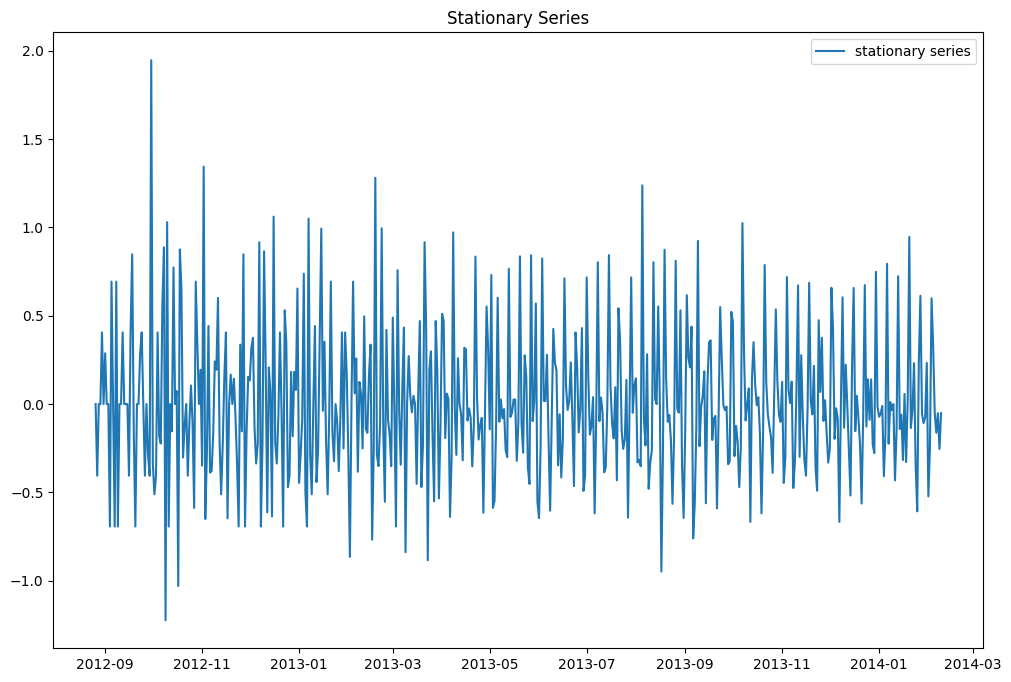

In [154]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [155]:
adf_test(train_data['count_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.196201e+00
p-value                        2.431038e-10
#Lags Used                     1.900000e+01
Number of Observations Used    5.130000e+02
Critical Value (1%)           -3.443162e+00
Critical Value (5%)           -2.867190e+00
Critical Value (10%)          -2.569780e+00
dtype: float64


In [156]:
kpss_test(train_data['count_log_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.118695
p-value                   0.100000
Lags Used                45.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Prashant\AppData\Local\Temp\ipykernel_26100\598097767.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


# ACF and PACF plots

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

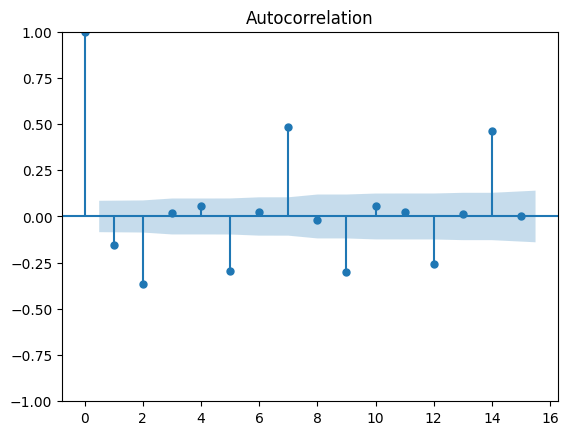

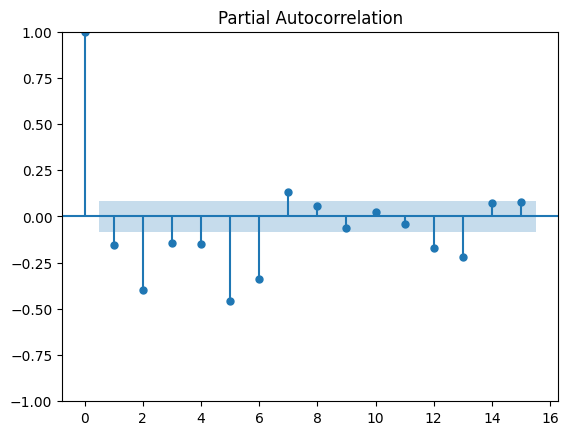

In [20]:
plot_acf(train_data['count_log_diff'].dropna(), lags=15)
plot_pacf(train_data['count_log_diff'].dropna(), lags=15)
plt.show()

   - p value is the lag value where the PACF chart crosses the confidence interval for the first time. It can be noticed that in this case p=2.

   - q value is the lag value where the ACF chart crosses the confidence interval for the first time. It can be noticed that in this case q=2.

   - Now we will make the ARIMA model as we have the p,q values.

# ARIMA

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [241]:
# fit model
model = ARIMA(train_data['count_log'], order=(2,2,1), missing='drop')   # (2,1,2) are the values of p,d,q
model_fit = model.fit()

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [242]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              count_log   No. Observations:                  534
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -247.139
Date:                Thu, 07 Dec 2023   AIC                            502.278
Time:                        16:38:08   BIC                            519.384
Sample:                    08-25-2012   HQIC                           508.972
                         - 02-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2115      0.043     -4.920      0.000      -0.296      -0.127
ar.L2         -0.3956      0.042     -9.363      0.000      -0.478      -0.313
ma.L1         -1.0000     12.526     -0.080      0.9

In [243]:
valid_data.shape

(229, 5)

In [244]:
# gernerate forecasts
output = model_fit.forecast(len(valid_data)) 
output

2014-02-10    5.141115
2014-02-11    5.147740
2014-02-12    5.109743
2014-02-13    5.127551
2014-02-14    5.151209
                ...   
2014-09-22    6.839195
2014-09-23    6.846906
2014-09-24    6.854617
2014-09-25    6.862329
2014-09-26    6.870040
Freq: D, Name: predicted_mean, Length: 229, dtype: float64

In [245]:
valid_data['Arima'] = output

In [246]:
valid_data.head()

,Date,count,Arima,Arima_in_orig_scale,Arima_pred
Date,,,,,
2014-02-09,2014-02-09,196,NaN,NaN,NaN
2014-02-10,2014-02-10,299,5.141115,189.662555,189.662555
2014-02-11,2014-02-11,224,5.147740,191.039324,191.039324
2014-02-12,2014-02-12,216,5.109743,192.426087,192.426087
2014-02-13,2014-02-13,212,5.127551,193.822916,193.822916


In [247]:
# to deal with log transformed values
valid_data['Arima_in_orig_scale'] = np.exp(valid_data['Arima'])

In [248]:
valid_data.head(10)

,Date,count,Arima,Arima_in_orig_scale,Arima_pred
Date,,,,,
2014-02-09,2014-02-09,196,NaN,NaN,NaN
2014-02-10,2014-02-10,299,5.141115,170.906192,189.662555
2014-02-11,2014-02-11,224,5.147740,172.042189,191.039324
2014-02-12,2014-02-12,216,5.109743,165.627703,192.426087
2014-02-13,2014-02-13,212,5.127551,168.603663,193.822916
2014-02-14,2014-02-14,236,5.151209,172.640069,195.229885
2014-02-15,2014-02-15,134,5.151553,172.699529,196.647068
2014-02-16,2014-02-16,117,5.154514,173.211632,198.074537
2014-02-17,2014-02-17,239,5.166145,175.237914,199.512369


In [249]:
valid_data["Arima_pred"] = valid_data['Arima_in_orig_scale']

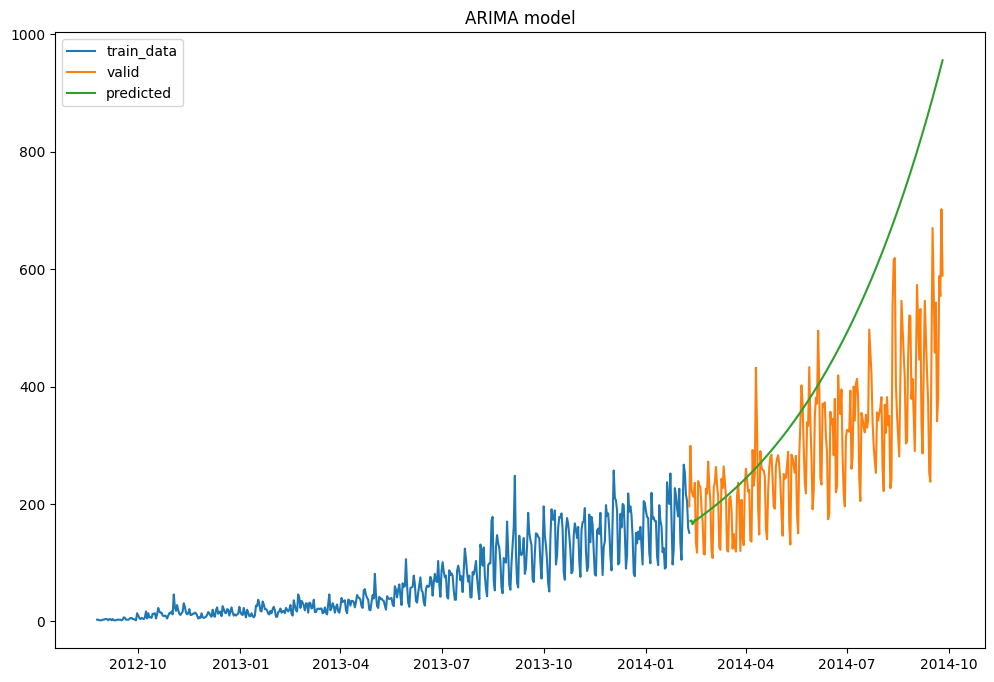

In [250]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index, valid_data['count'], label='valid')
plt.plot(valid_data.index, valid_data['Arima_pred'], label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

In [230]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Arima_pred']))
print('The RMSE value for ARIMA is', rmse)

ValueError: Input contains NaN.

# SARIMA

In [28]:
from statsmodels.tsa.statespace import sarimax

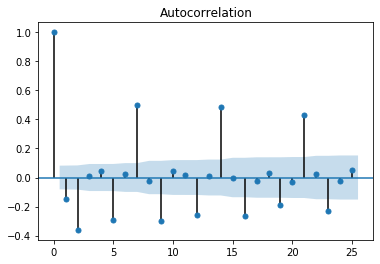

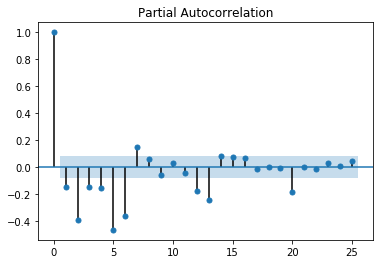

In [29]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [30]:
train_data['count_log'] = np.log(train_data['count'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(7)

In [31]:
train_data['count_log_diff'].head(10)

Date
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
2012-08-30         NaN
2012-08-31         NaN
2012-09-01    0.287682
2012-09-02    0.287682
2012-09-03    0.693147
Name: count_log_diff, dtype: float64

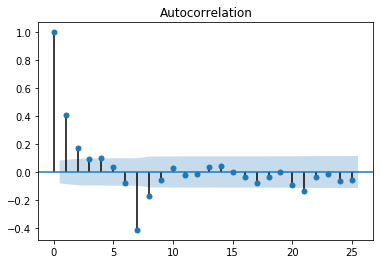

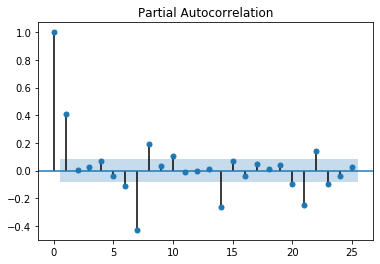

In [32]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [33]:
# fit model
model = sarimax.SARIMAX(train_data['count_log'], seasonal_order=(1,1,1,7), order=(2,1,2))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="2014-02-09", end="2014-09-25", dynamic=True)

/home/aishwarya/anaconda3/envs/av/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aishwarya/anaconda3/envs/av/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aishwarya/anaconda3/envs/av/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

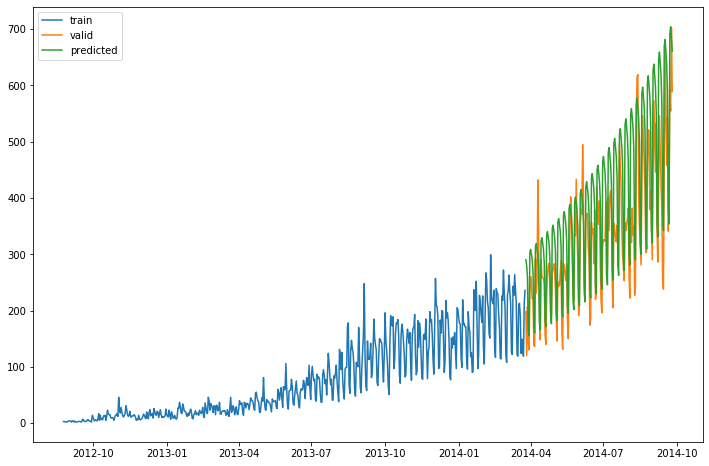

In [35]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['SARIMA'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [36]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 93.3265642066159


In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data
# df = pd.read_csv('your_timeseries_data.csv')
# For this example, let's assume df is your DataFrame and 'date' and 'value' are columns
# df['date'] = pd.to_datetime(df['date'])
# ts = df.set_index('date')['value']

# For demonstration, let's use statsmodels' built-in dataset
data = sm.datasets.sunspots.load_pandas().data
ts = data['SUNACTIVITY']

# Define and fit the model
# ARIMA parameters are (p, d, q)
# p: periods taken for autoregressive model
# d: integrated order, difference
# q: periods in moving average model
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make forecast
forecast = model_fit.forecast(steps=5)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1312.926
Date:                Thu, 07 Dec 2023   AIC                           2637.851
Time:                        16:21:48   BIC                           2660.232
Sample:                             0   HQIC                          2646.800
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4511      0.048      9.358      0.000       0.357       0.546
ar.L2         -0.0806      0.050     -1.602      0.109      -0.179       0.018
ar.L3         -0.2144      0.065     -3.299      0.0